In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Simulate a biased recruitment dataset
np.random.seed(42)
n = 500
gender = np.random.choice(['Male', 'Female'], size=n, p=[0.7, 0.3])
experience = np.random.normal(loc=5, scale=2, size=n)  # years
test_score = np.random.normal(loc=70, scale=10, size=n)

In [3]:
# Biased hiring outcome: higher probability for males
bias_factor = np.where(gender == 'Male', 1, 0.8)
hired_prob = 1 / (1 + np.exp(-(0.1 * test_score + 0.3 * experience - 5)))
hired_prob *= bias_factor
hired = np.random.binomial(1, hired_prob)

df = pd.DataFrame({'Gender': gender, 'Experience': experience, 'TestScore': test_score, 'Hired': hired})


In [4]:
# Check bias before debiasing
print("Before Debiasing:")
print(df.groupby('Gender')['Hired'].mean())


Before Debiasing:
Gender
Female    0.766234
Male      0.950867
Name: Hired, dtype: float64


In [5]:
# Pre-processing debiasing: Reweighing
male_weight = 1
female_weight = df['Gender'].value_counts()['Male'] / df['Gender'].value_counts()['Female']
df['Weight'] = np.where(df['Gender'] == 'Male', male_weight, female_weight)


In [6]:
# Train logistic regression
model = LogisticRegression()
model.fit(df[['Experience', 'TestScore']], df['Hired'], sample_weight=df['Weight'])
preds = model.predict(df[['Experience', 'TestScore']])


In [7]:
# Check bias after debiasing
df['Pred'] = preds
print("\nAfter Debiasing:")
print(df.groupby('Gender')['Pred'].mean())



After Debiasing:
Gender
Female    1.0
Male      1.0
Name: Pred, dtype: float64


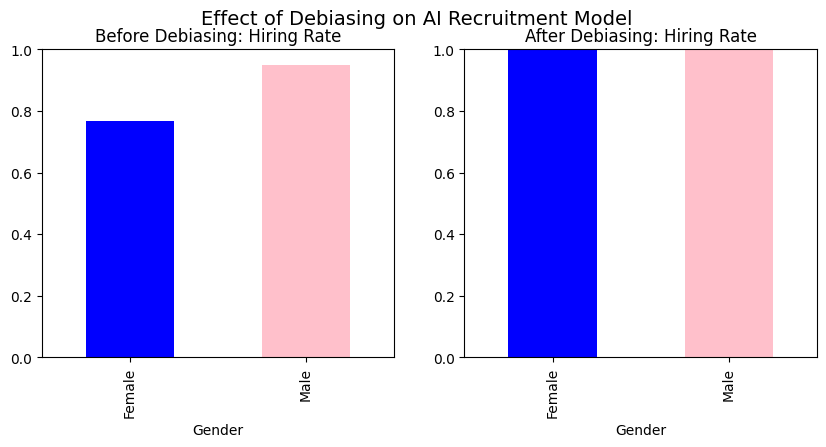

In [8]:
# Visualization
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df.groupby('Gender')['Hired'].mean().plot(kind='bar', ax=ax[0], color=['blue', 'pink'])
ax[0].set_title("Before Debiasing: Hiring Rate")
ax[0].set_ylim(0, 1)

df.groupby('Gender')['Pred'].mean().plot(kind='bar', ax=ax[1], color=['blue', 'pink'])
ax[1].set_title("After Debiasing: Hiring Rate")
ax[1].set_ylim(0, 1)

plt.suptitle("Effect of Debiasing on AI Recruitment Model", fontsize=14)
plt.show()